In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# combine csv chunks generated by the labelling

CHUNKS_PATH = "./labelled_tldr-17_chunks"
COMBINED_PATH = "./labelled_tldr_combined.csv"

if not os.path.exists(COMBINED_PATH):
    file_names = os.listdir(CHUNKS_PATH)
    df = pd.DataFrame()
    for file_name in file_names:
        df = pd.concat([df, pd.read_csv(f"{CHUNKS_PATH}/{file_name}")])

    df.to_csv(COMBINED_PATH, index=False)

df = pd.read_csv(COMBINED_PATH)
df.head()

    
   

,content,summary,age,gender,subreddit
0,Little background info i am 25 and shes 29 (30...,i asked her to stop taking the pill for 2 mont...,25,M,relationship_advice
1,I (27/m) am in your shoes (not cross-border an...,It will hurt him in the short-term if you leav...,27,M,relationships
2,"I like how she attacks your/our generation, bu...",I'm a bitter 30 year old.,30,M,TalesFromRetail
3,"I started dying my hair when I was 14, my mom ...",Want to shave my head and wear wigs until it's...,20,F,FancyFollicles
4,"Okay, so my SO (21 f CAN) and I (20 m US) met ...",My girlfriend hasn't told her family about me ...,20,M,LongDistance


In [5]:
len(df)

1348

In [6]:
df["gender"] == "male"

0       False
1       False
2       False
3       False
4       False
        ...  
1343    False
1344    False
1345    False
1346    False
1347    False
Name: gender, Length: 1348, dtype: bool

In [7]:
df.loc[df["gender"] == "male", "gender"] = "M"
df.loc[df["gender"] == "f", "gender"] = "F"
df.gender.value_counts()


gender
M    936
F    412
Name: count, dtype: int64

In [8]:
df.age.mean()

np.float64(23.04005934718101)

In [9]:
df.age.std()

np.float64(6.9009234502105645)

([<matplotlib.patches.Wedge at 0x139087b90>,
 [Text(-0.9012304530764078, -0.6307009358227503, 'M'),
  Text(0.9012302475679097, 0.6307012294808726, 'F')],
 [Text(-0.49158024713258597, -0.3440186922669547, '69.4%'),
  Text(0.4915801350370416, 0.3440188524441123, '30.6%')])

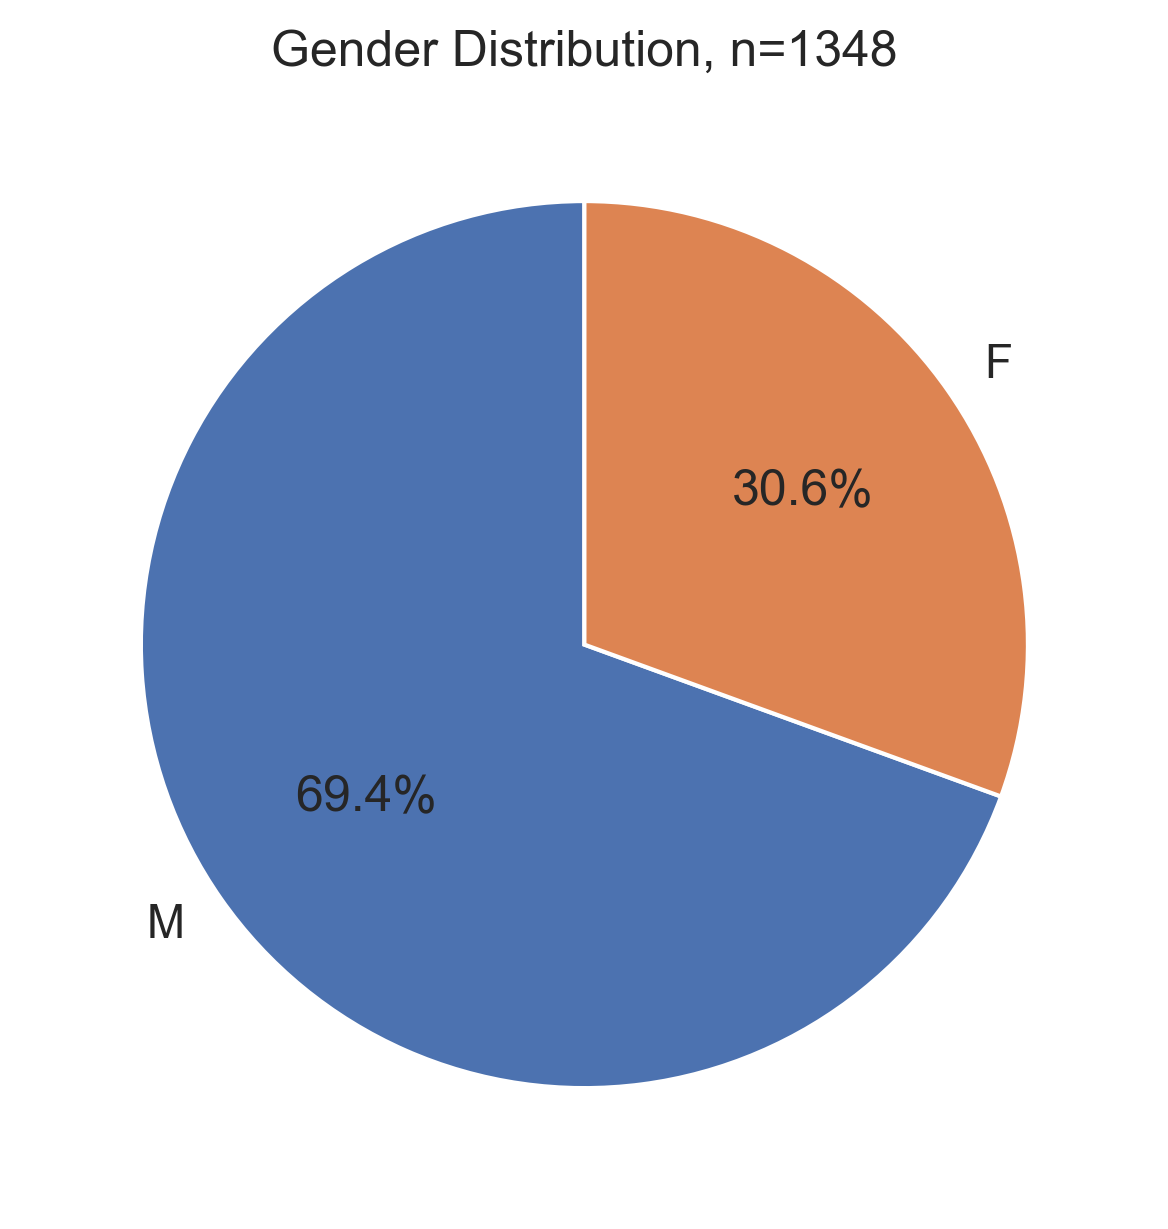

In [10]:
sns.set_theme(style="darkgrid")
plt.rcParams["figure.dpi"] = 300
plt.title("Gender Distribution, n=1348")
plt.pie(x=df.gender.value_counts(), labels=df.gender.value_counts().index, autopct="%1.1f%%", startangle=90)

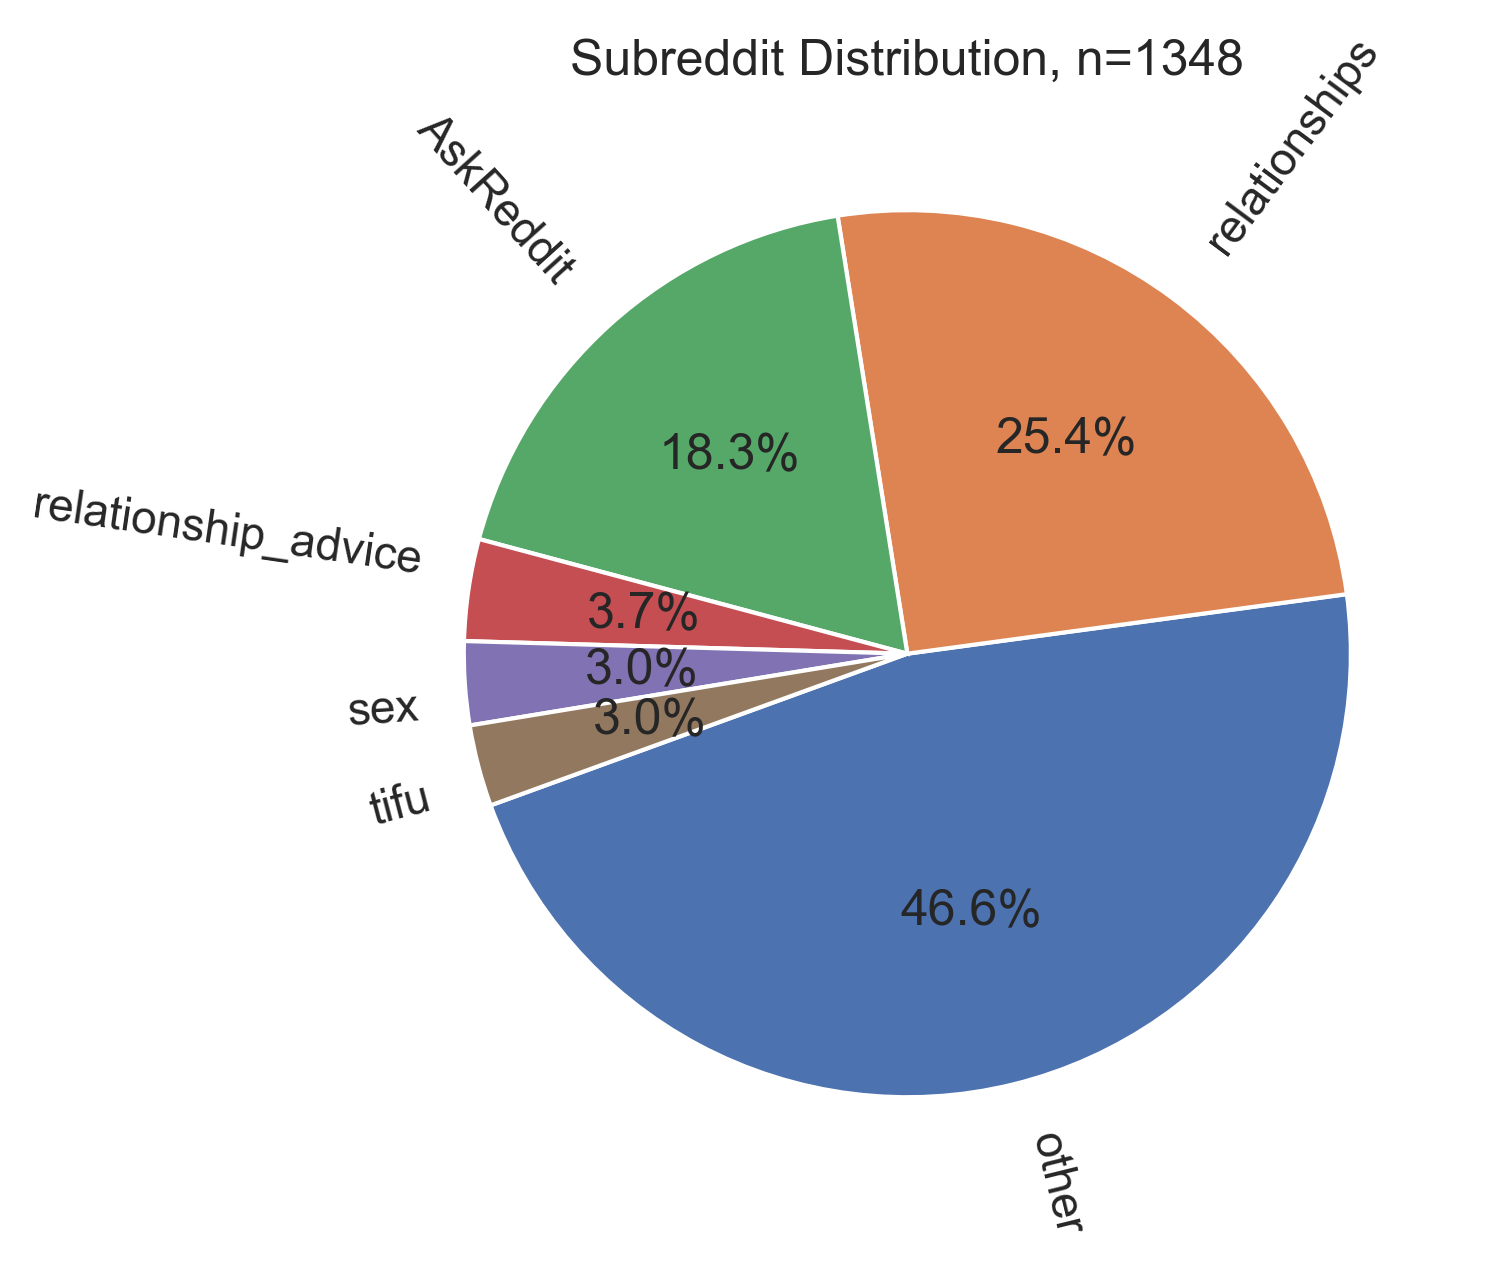

In [11]:
df.subreddit.value_counts()

# preprocess so that reddits < 10 are grouped into "other"
df_sub = df.copy()
df_sub.loc[df_sub["subreddit"].map(df_sub["subreddit"].value_counts()) < 30, "subreddit"] = "other"
df_sub.subreddit.value_counts()

plt.title("Subreddit Distribution, n=1348")
plt.pie(x=df_sub.subreddit.value_counts(), labels=df_sub.subreddit.value_counts().index, autopct="%1.1f%%", startangle=200, rotatelabels=True)
plt.show()

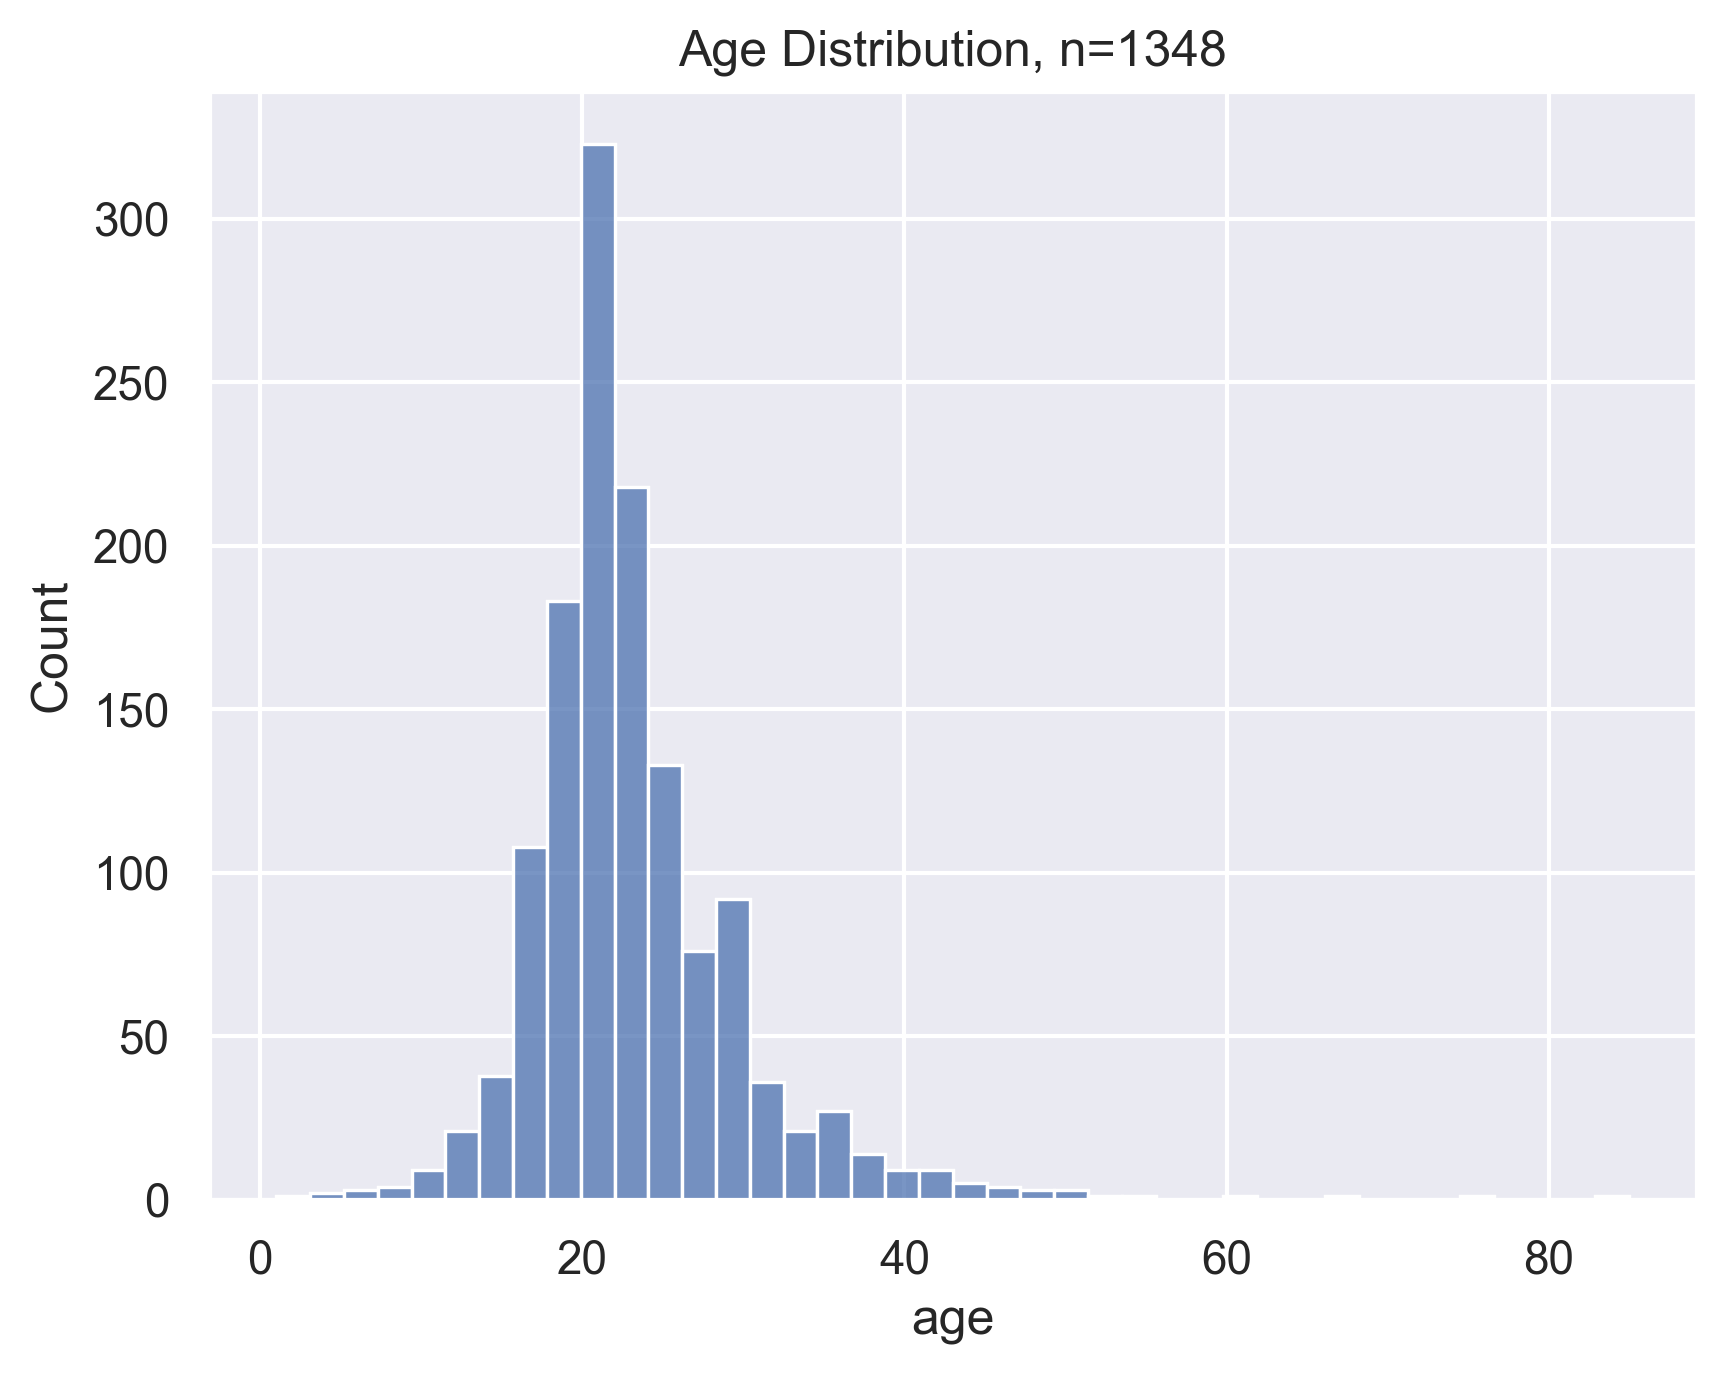

In [12]:
# show age distribution
sns.histplot(df.age, bins=40)
plt.title("Age Distribution, n=1348")
plt.show()


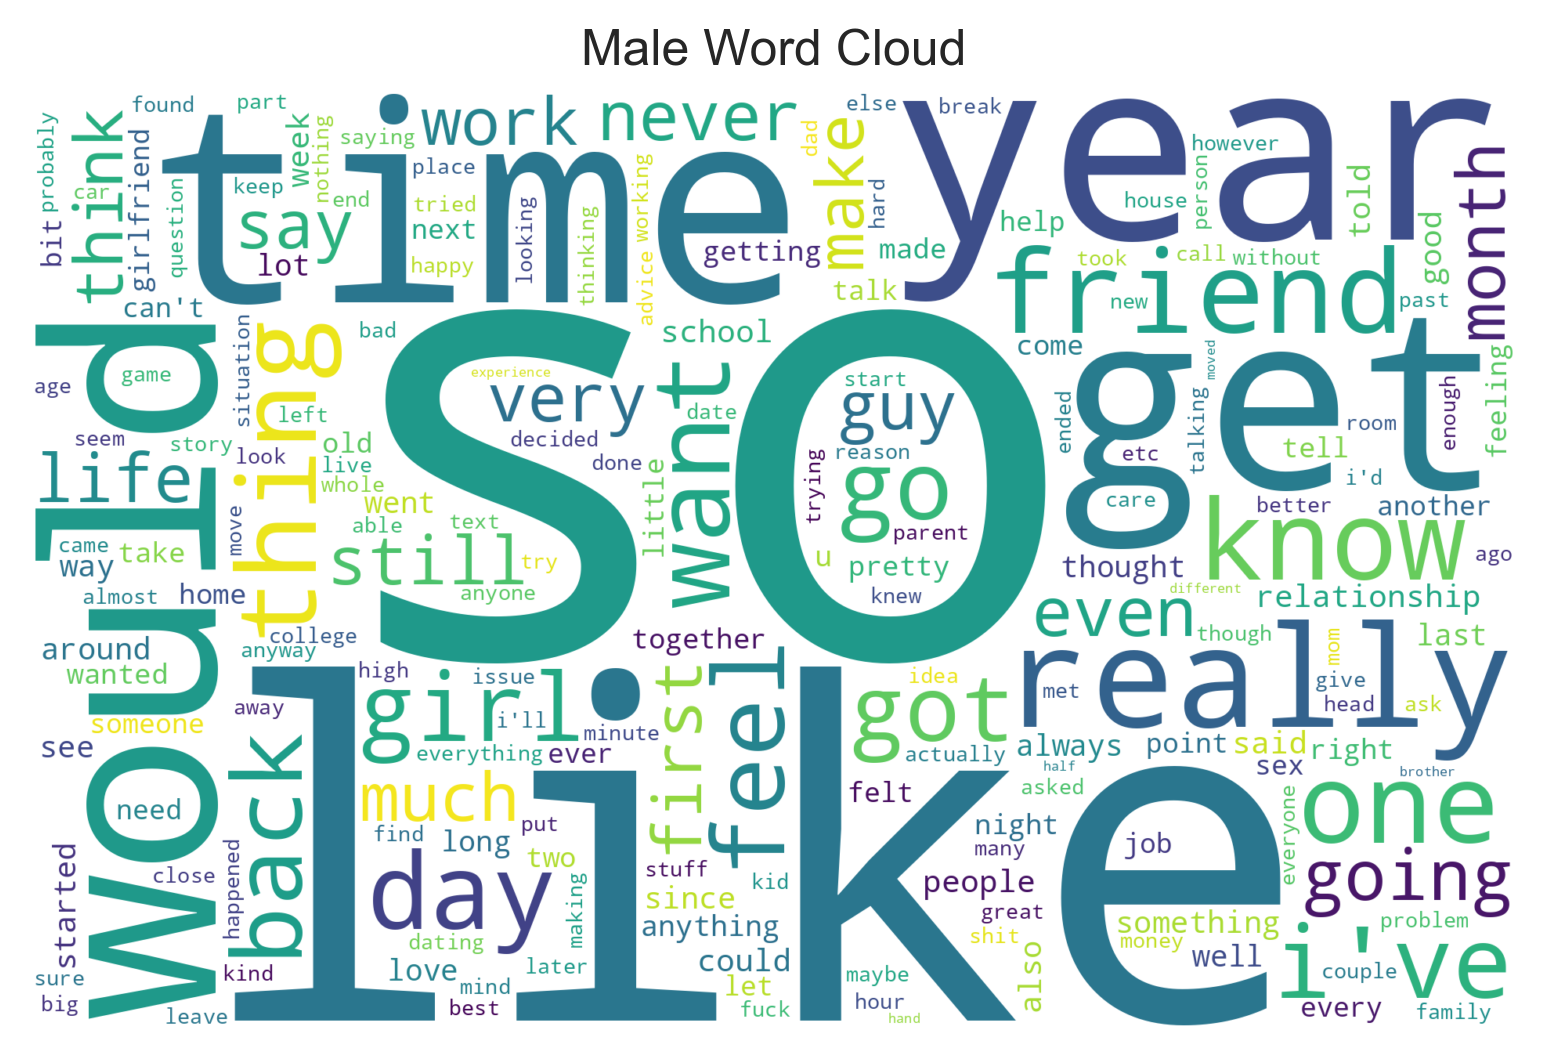

In [13]:
from wordcloud import WordCloud
import random
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words.difference_update(
    {"so", "really", "very", "pretty"}
)
stop_words.add("i'm")

male_text = ""
female_text = ""
for i,text in df.iterrows():
    if text.gender == "M":
        male_text += text.content.lower()
    else:
        female_text += text.content.lower()

wordcloud = WordCloud(width=1900, height=1200, background_color="white", margin=10, stopwords=stop_words, collocations=False).generate(male_text)
plt.title("Male Word Cloud")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

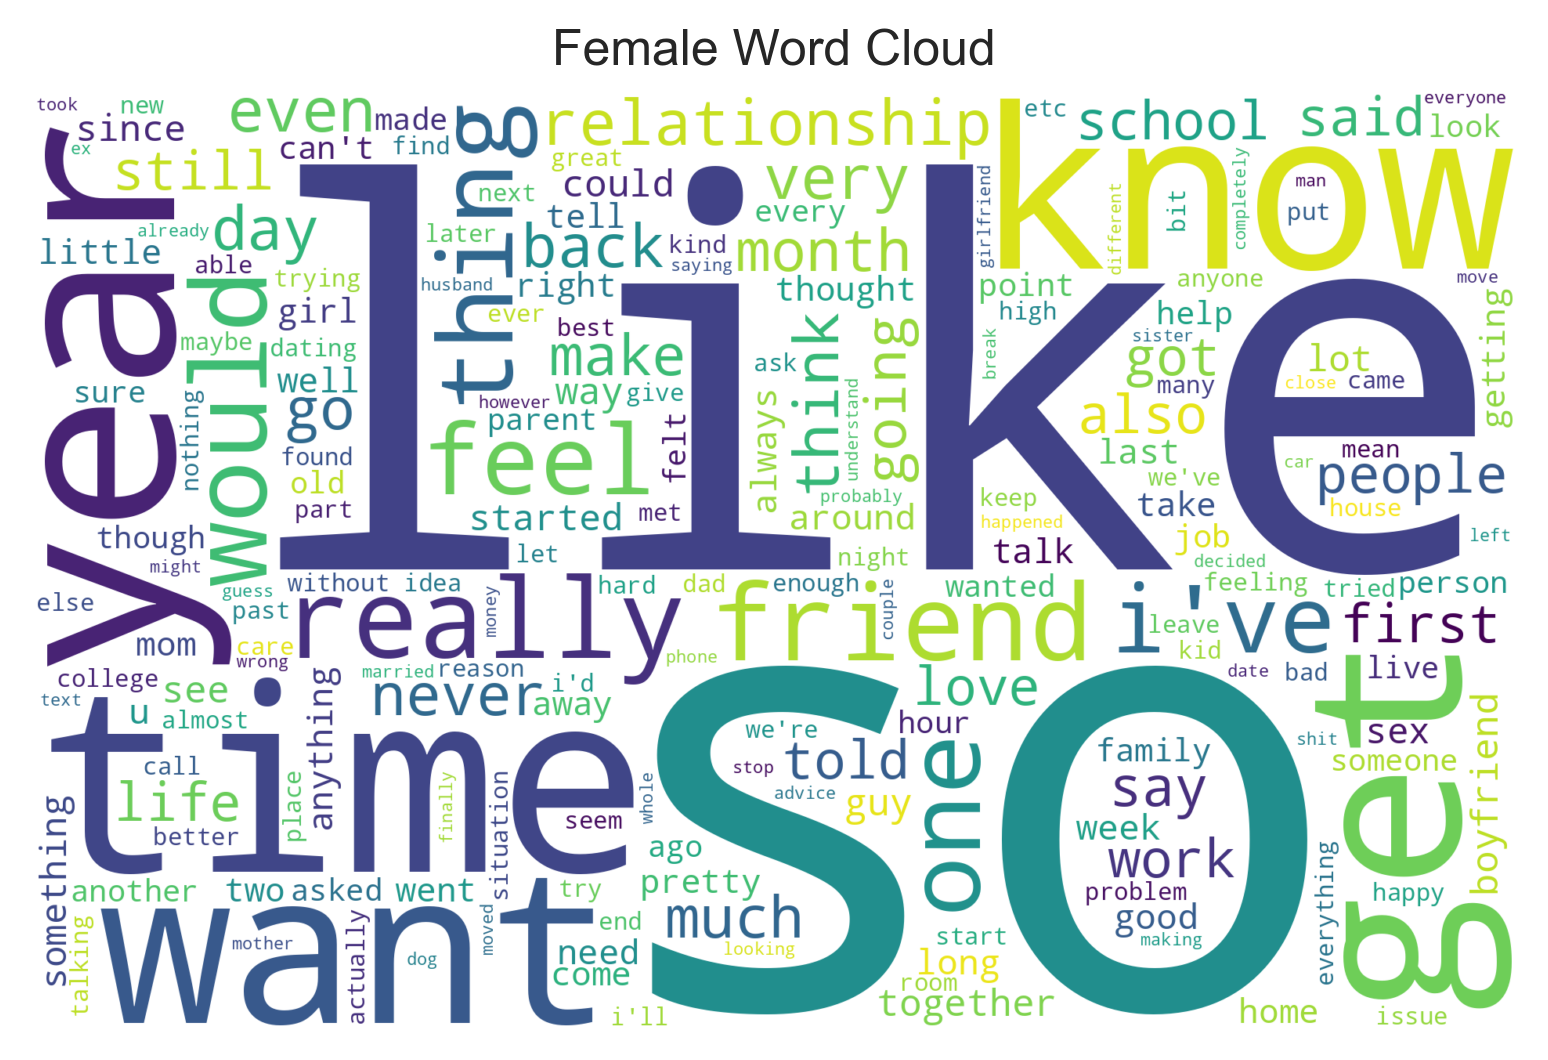

In [14]:
wordcloud = WordCloud(width=1900, height=1200, background_color="white", margin=10, collocations=False,
                      stopwords=stop_words).generate(
    female_text
)

plt.title("Female Word Cloud")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [15]:
import nltk


In [16]:

male_tokens = nltk.word_tokenize(male_text)
male_tokens = [word.lower() for word in male_tokens if word.isalpha() and word.lower() not in stop_words]
male_bgs = nltk.bigrams(male_tokens)
male_fdist = nltk.FreqDist(male_bgs)
for p in male_fdist.most_common(10):
    print(p[0][0]  + " " + p[0][1] + " - " + f"{p[1]*100/male_fdist.N():.0}%")
    
    

feel like - 0.2%
high school - 0.1%
year old - 0.08%
first time - 0.06%
so much - 0.06%
even though - 0.06%
years old - 0.05%
one day - 0.05%
felt like - 0.05%
pretty much - 0.05%


In [17]:

female_tokens = nltk.word_tokenize(female_text)
female_tokens = [word.lower() for word in female_tokens if word.isalpha() and word.lower() not in stop_words]
female_bgs = nltk.bigrams(female_tokens)
female_fdist = nltk.FreqDist(female_bgs)
for p in female_fdist.most_common(10):
    print(p[0][0]  + " " + p[0][1] + " - " + f"{p[1]*100/female_fdist.N():.0}%")
    

feel like - 0.2%
high school - 0.1%
so much - 0.09%
even though - 0.07%
year old - 0.05%
last year - 0.05%
pretty much - 0.05%
first time - 0.05%
months ago - 0.05%
started dating - 0.04%


In [33]:
female_fdist_ug = nltk.FreqDist(female_tokens)
for t in female_fdist_ug.most_common(10):
    print(t[0] + " - " + f"{t[1]*100/female_fdist_ug.N():.2}%")

female_fdist_ug.N()

so - 1.5%
like - 1.1%
time - 0.79%
really - 0.73%
would - 0.73%
know - 0.72%
get - 0.67%
want - 0.62%
one - 0.59%
feel - 0.51%


83839

In [35]:
male_fdist_ug.get("really")

1289

In [24]:
INTENSIFIERS = ("so", "really", "very", "pretty")

In [25]:
print("Female distribution")
for t in INTENSIFIERS:
    print(t)
    print(female_fdist_ug.get(t)/female_fdist_ug.N())

Female distribution
so
0.015398561528644187
really
0.007347415880437505
very
0.004842615012106538
pretty
0.002313958897410513


In [26]:
male_fdist_ug = nltk.FreqDist(male_tokens)
male_fdist_ug.most_common(10)

[('so', 2656),
 ('like', 1820),
 ('time', 1470),
 ('would', 1452),
 ('get', 1349),
 ('really', 1289),
 ('one', 1145),
 ('know', 1121),
 ('want', 932),
 ('go', 895)]

In [27]:
for t in INTENSIFIERS:
    print(t)
    print(male_fdist_ug.get(t)/male_fdist_ug.N())

so
0.014294940796555435
really
0.00693756727664155
very
0.003719052744886975
pretty
0.0022658772874058126


In [36]:
from scipy.stats import chi2_contingency
import numpy as np
for t in INTENSIFIERS:
    contingency_table = np.array([
        [male_fdist_ug.get(t), female_fdist_ug.get(t)],
        [male_fdist_ug.N()-male_fdist_ug.get(t), female_fdist_ug.N()-female_fdist_ug.get(t)]
    ])

    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(t)
    print("p", p)
    print("chi2", chi2)
    print("expected\n", expected)
    print("observed\n", contingency_table) 
    print("=====")

so
p 0.028425277806548008
chi2 4.802087349504494
expected
 [[  2719.75715679   1227.24284321]
 [183080.24284321  82611.75715679]]
observed
 [[  2656   1291]
 [183144  82548]]
=====
really
p 0.24960488077729598
chi2 1.3255138417610959
expected
 [[  1312.67732042    592.32267958]
 [184487.32267958  83246.67732042]]
observed
 [[  1289    616]
 [184511  83223]]
=====
very
p 2.5554026281205005e-05
chi2 17.72283722133413
expected
 [[   755.90919711    341.09080289]
 [185044.09080289  83497.90919711]]
observed
 [[   691    406]
 [185109  83433]]
=====
pretty
p 0.8425342476258022
chi2 0.039462986024007336
expected
 [[   423.77771762    191.22228238]
 [185376.22228238  83647.77771762]]
observed
 [[   421    194]
 [185379  83645]]
=====
